In [6]:
import pandas as pd
# Load the files
data1 = pd.read_csv('Blue_Bike_Stations.csv')
data2 = pd.read_csv('Existing_Bike_Network_2023.csv')
data3 = pd.read_excel('2015-2019_neighborhood_tables_2021.12.21.xlsm', engine='openpyxl')

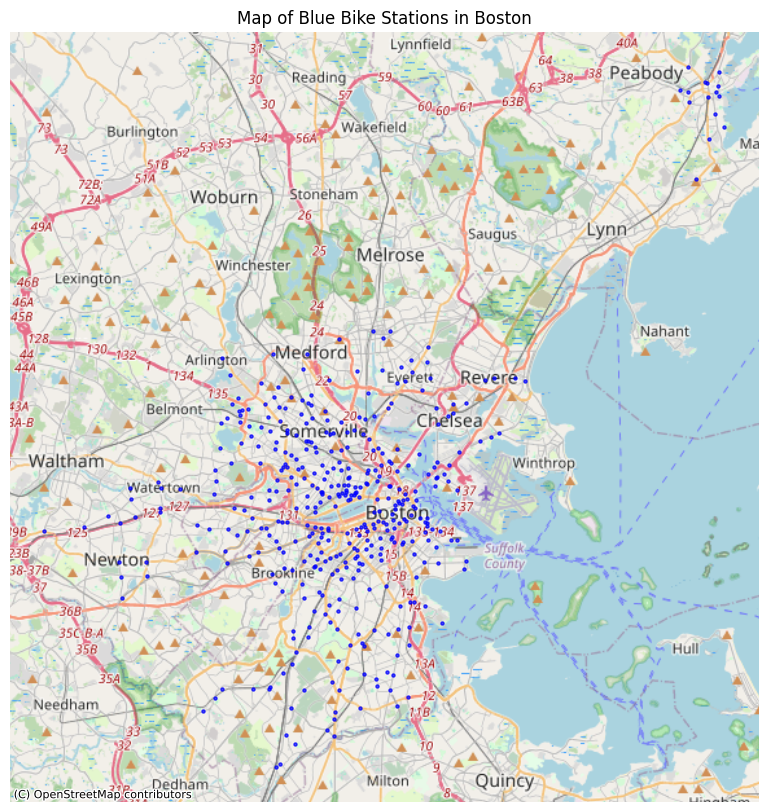

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

data1 = pd.read_csv('Blue_Bike_Stations.csv')

# Convert dataframe -> geodataframe
gdf = gpd.GeoDataFrame(data1, geometry=gpd.points_from_xy(data1.Longitude, data1.Latitude))
gdf.crs = 'EPSG:4326'
gdf = gdf.to_crs(epsg=3857)

# plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.7)

# base map
try:
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
except KeyError:
    print(list(ctx.providers.keys()))
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
plt.title("Map of Blue Bike Stations in Boston")
plt.show()

['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava', 'OrdnanceSurvey']


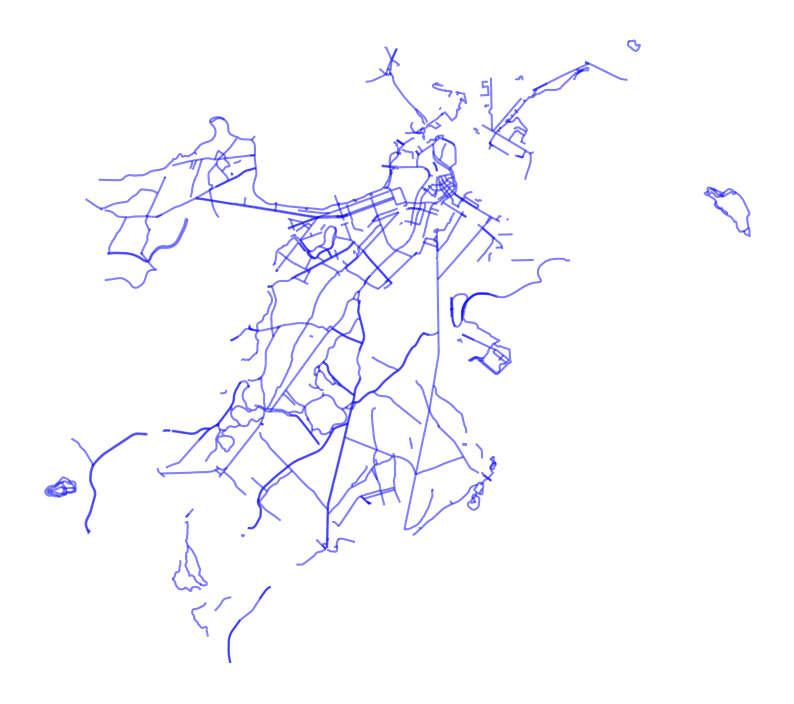

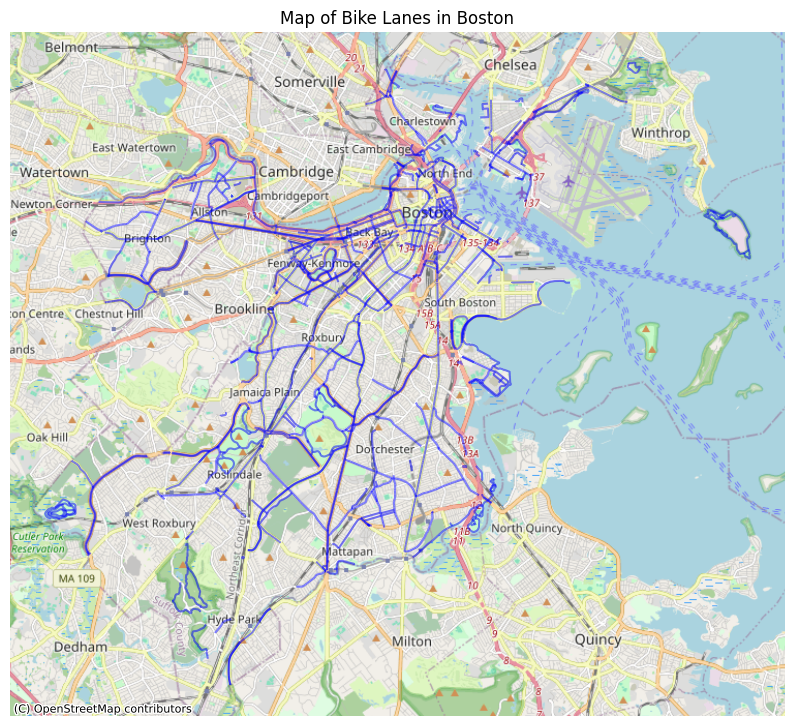

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
bike_network_gdf = gpd.read_file('Existing_Bike_Network_2023/Existing_Bike_Network_2023.shp')

# print(bike_network_gdf.head())
# print(bike_network_gdf.crs)

fig, ax = plt.subplots(figsize=(10, 10))
bike_network_gdf.plot(ax=ax, alpha=0.5, color='blue')
ax.set_axis_off()

if bike_network_gdf.crs is None:
    bike_network_gdf.crs = 'EPSG:4326'

bike_network_gdf = bike_network_gdf.to_crs(epsg=3857)

# base map
fig, ax = plt.subplots(figsize=(10, 10))
bike_network_gdf.plot(ax=ax, alpha=0.5, color='blue')
try:
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
except AttributeError:
    print(list(ctx.providers.keys()))
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.title("Map of Bike Lanes in Boston")
plt.show()


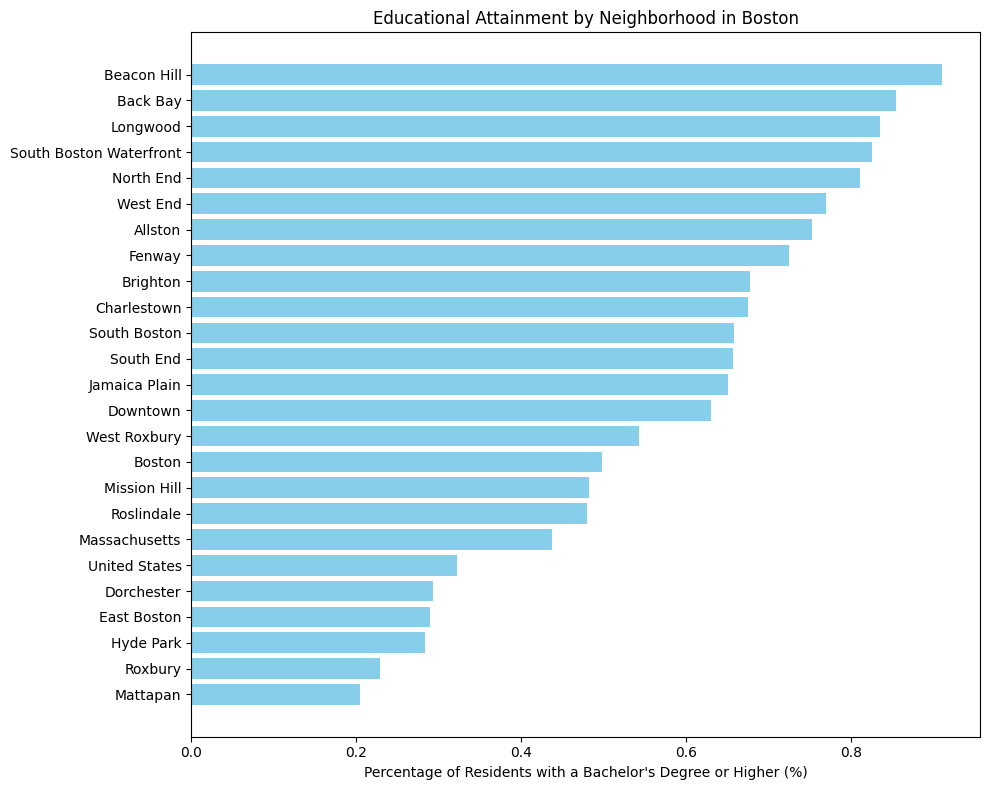

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

header_row = 2
data3 = pd.read_excel('2015-2019_neighborhood_tables_2021.12.21.xlsm', 
                      sheet_name='Educational Attainment', 
                      header=header_row, 
                      engine='openpyxl')

numeric_cols = ['%.5', '%.6']  
data3 = data3.dropna(subset=numeric_cols, how='all')  
data3 = data3[pd.to_numeric(data3['%.5'], errors='coerce').notnull()]  

data3['Bachelor\'s Degree %'] = pd.to_numeric(data3['%.5'], errors='coerce')  
data3['Master\'s Degree or more %'] = pd.to_numeric(data3['%.6'], errors='coerce')  
data3['Degree %'] = data3['Bachelor\'s Degree %'] + data3['Master\'s Degree or more %']

data3.rename(columns={'Unnamed: 0': 'Neighborhood'}, inplace=True)

data3_sorted = data3.sort_values(by='Degree %', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(data3_sorted['Neighborhood'], data3_sorted['Degree %'], color='skyblue')
plt.xlabel('Percentage of Residents with a Bachelor\'s Degree or Higher (%)')
plt.title('Educational Attainment by Neighborhood in Boston')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

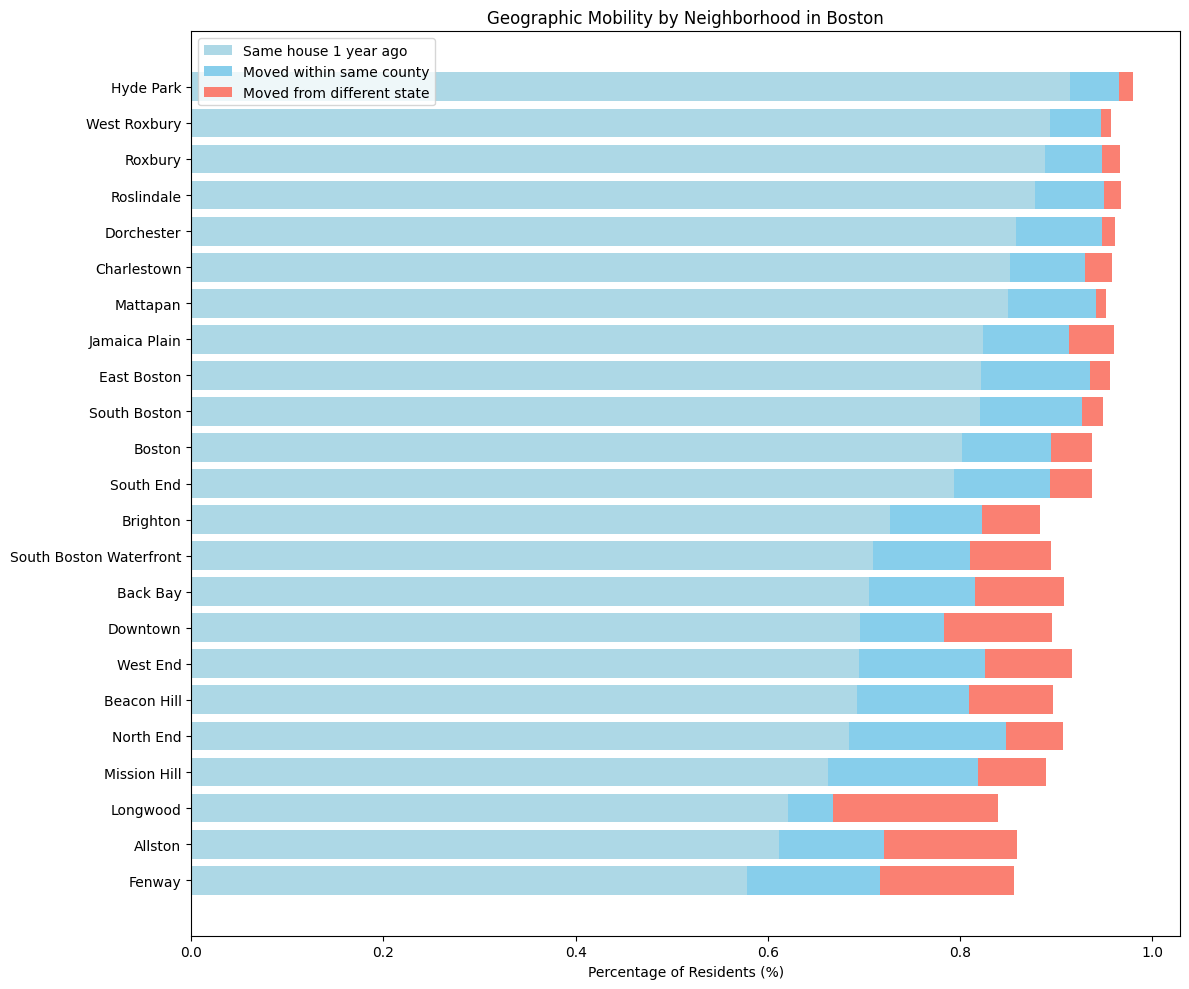

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

header_row = 2
data_mobility = pd.read_excel('2015-2019_neighborhood_tables_2021.12.21.xlsm', 
                              sheet_name='Geographic Mobility', 
                              header=header_row, 
                              engine='openpyxl')

data_mobility.rename(columns={'Unnamed: 0': 'Neighborhood'}, inplace=True)
data_mobility = data_mobility[~data_mobility['Neighborhood'].str.contains("Total|United States|Massachusetts", na=False)]
data_mobility['Same house 1 year ago %'] = pd.to_numeric(data_mobility['%'], errors='coerce')
data_mobility['Moved within same county %'] = pd.to_numeric(data_mobility['%.1'], errors='coerce')
data_mobility['Moved from different state %'] = pd.to_numeric(data_mobility['%.3'], errors='coerce')

data_mobility.dropna(subset=['Same house 1 year ago %', 'Moved within same county %', 'Moved from different state %'], inplace=True)
data_mobility_sorted = data_mobility.sort_values(by='Same house 1 year ago %', ascending=False)

plt.figure(figsize=(12, 10))

plt.barh(data_mobility_sorted['Neighborhood'], data_mobility_sorted['Same house 1 year ago %'], 
         label='Same house 1 year ago', color='lightblue')

plt.barh(data_mobility_sorted['Neighborhood'], data_mobility_sorted['Moved within same county %'], 
         left=data_mobility_sorted['Same house 1 year ago %'], 
         label='Moved within same county', color='skyblue')

plt.barh(data_mobility_sorted['Neighborhood'], data_mobility_sorted['Moved from different state %'], 
         left=data_mobility_sorted['Same house 1 year ago %'] + data_mobility_sorted['Moved within same county %'], 
         label='Moved from different state', color='salmon')

plt.xlabel('Percentage of Residents (%)')
plt.title('Geographic Mobility by Neighborhood in Boston')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()